In [1]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

### Helping Implementation

In [2]:
def plot_data_and_centers(data, centers=None):

    plt.figure(figsize=(9,9))
    
    # Plot the data and the centers generated as random
    plt.scatter(data[:,0], data[:,1], s=7)
    if isinstance(centers,type(np.array([]))):
        plt.scatter(centers[:,0], centers[:,1], marker='o', c='r', s=150)    

# K-Means Clustering

![](https://raw.githubusercontent.com/SamirMoustafa/Machine-Learning-Implementation/master/K-Mean/Kmean.gif?token=AePw1BQcvSAbp2IiniAdMnmaDEOi_0p4ks5cr8TqwA%3D%3D)

# Generate Random Data
Generate random data normally distributed around 4 centers, with a noise.

In [3]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])
center_4 = np.array([10,5])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200,2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3
data_4 = np.random.randn(200,2) + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

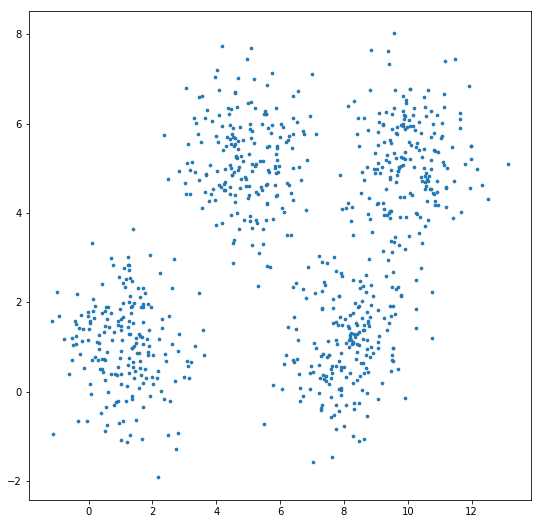

In [4]:
plot_data_and_centers(data)

In [5]:
# Number of clusters
k = 4
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

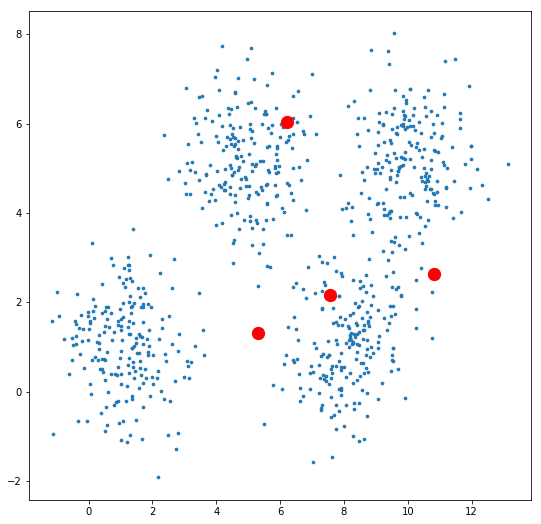

In [6]:
plot_data_and_centers(data, centers)

### Algorithm

In [7]:
def K_Mean(data, centers=None):
    if not isinstance(centers, type(np.array([]))):
        mean = np.mean(data, axis = 0)
        std = np.std(data, axis = 0)
        centers = np.random.randn(k,c)*std + mean
        
    centers_old = np.zeros(centers.shape) # to store old centers
    centers_new = deepcopy(centers) # Store new centers

    clusters = np.zeros(n)
    distances = np.zeros((n,k))

    error = np.linalg.norm(centers_new - centers_old)

    # When, after an update, the estimate of that center stays the same, exit loop
    while error != 0.0:
        # Measure the distance to every center
        for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
        # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)

        centers_old = deepcopy(centers_new)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)
    
    return centers_new

### Evaluation

In [8]:
centers = K_Mean(data, centers)

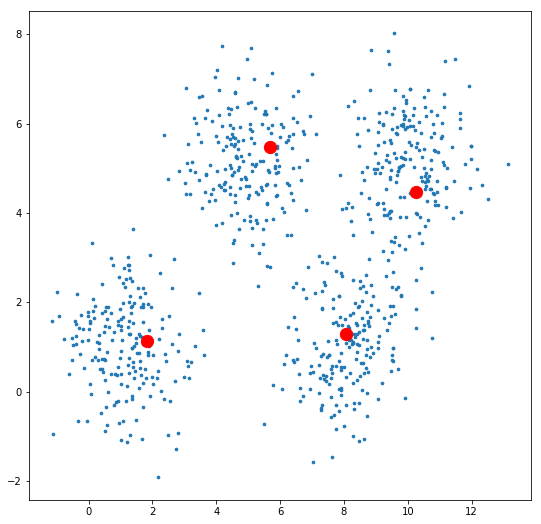

In [9]:
plot_data_and_centers(data, centers)